# Titanic Dataset Analysis - HW2
## Decision Tree vs Random Forest Classification

This notebook performs a comprehensive analysis of the Titanic dataset using Decision Tree and Random Forest algorithms with proper hyperparameter tuning and cross-validation.


## Import Libraries


In [45]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

## Load Data


In [46]:
train_df = pd.read_csv('titanic/train.csv')
test_df = pd.read_csv('titanic/test.csv')
combine = [train_df, test_df]

## 1. Data Preprocessing

The following sections perform comprehensive preprocessing on the Titanic dataset including:
- Handling missing values
- Feature engineering
- Encoding categorical variables
- Feature scaling


In [47]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [48]:
# preview the data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [50]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [51]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [52]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


In [53]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [54]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [55]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [56]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


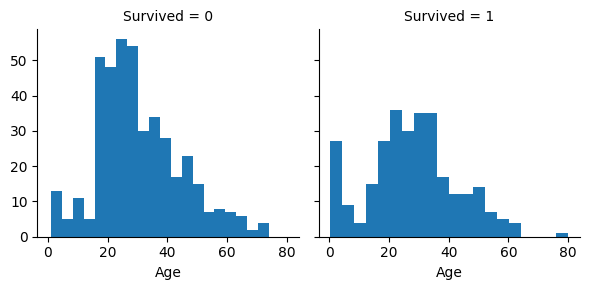

In [57]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

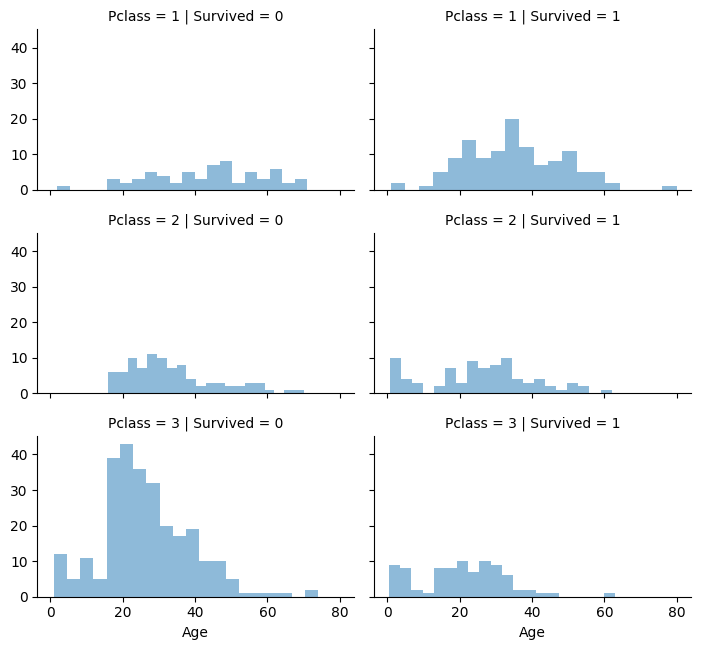

In [58]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

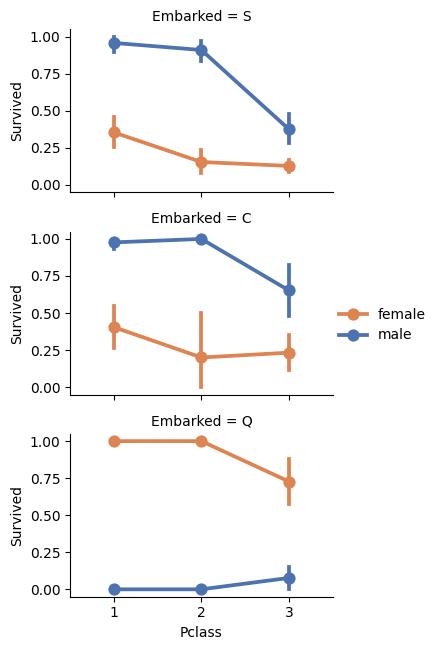

In [59]:
grid = sns.FacetGrid(train_df, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

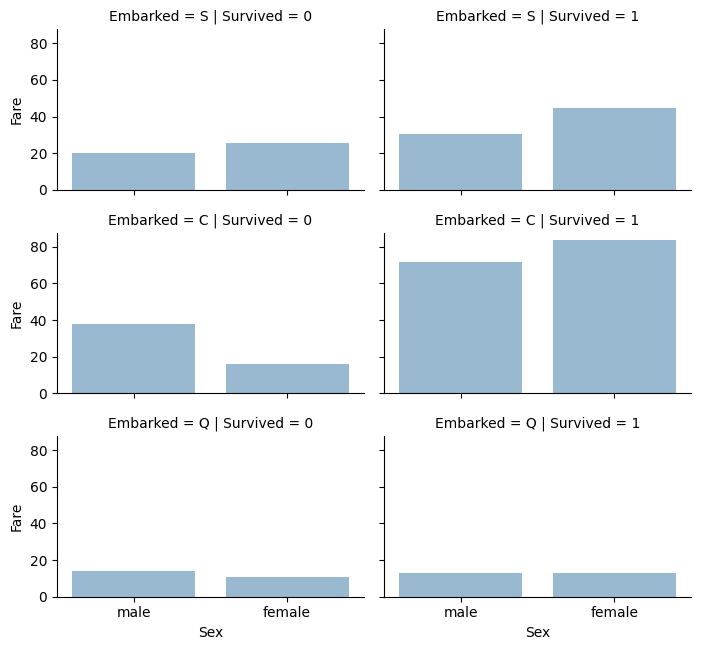

In [60]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

In [61]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

In [62]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [63]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [64]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [65]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

In [66]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


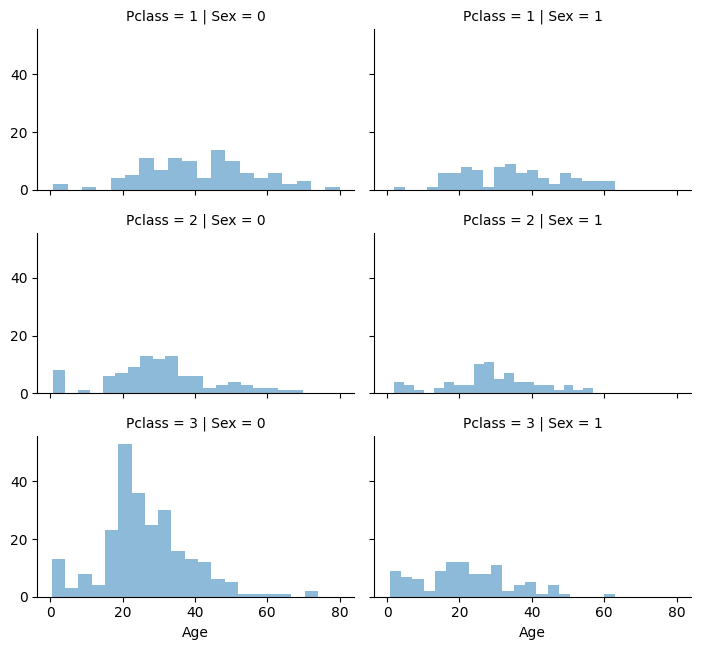

In [67]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [68]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [69]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [70]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [71]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [72]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


In [73]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [74]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [75]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [76]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


In [77]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [78]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [79]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


In [80]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


In [81]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [82]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


In [83]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


In [84]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [85]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.36

---
## 2. Decision Tree Model with Fine-Tuning

In this section, we will:
1. Perform hyperparameter tuning using GridSearchCV
2. Train the fine-tuned decision tree model
3. Plot the decision tree for visualization


In [86]:
# Define parameter grid for Decision Tree hyperparameter tuning
param_grid_dt = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2', None]
}

# Initialize GridSearchCV with 5-fold cross-validation
dt_classifier = DecisionTreeClassifier(random_state=42)
grid_search_dt = GridSearchCV(
    estimator=dt_classifier,
    param_grid=param_grid_dt,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit the grid search
print("Performing hyperparameter tuning for Decision Tree...")
grid_search_dt.fit(X_train, Y_train)

# Get the best parameters
print("\nBest parameters for Decision Tree:")
print(grid_search_dt.best_params_)
print(f"\nBest cross-validation accuracy: {grid_search_dt.best_score_:.4f}")


Performing hyperparameter tuning for Decision Tree...
Fitting 5 folds for each of 480 candidates, totalling 2400 fits

Best parameters for Decision Tree:
{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 8, 'min_samples_split': 2}

Best cross-validation accuracy: 0.8204


In [87]:
# Get the best model
best_dt_model = grid_search_dt.best_estimator_

# Make predictions
Y_pred_dt = best_dt_model.predict(X_test)

# Calculate accuracy on training set
acc_dt_tuned = round(best_dt_model.score(X_train, Y_train) * 100, 2)
print(f"Fine-tuned Decision Tree Training Accuracy: {acc_dt_tuned}%")


Fine-tuned Decision Tree Training Accuracy: 82.49%


### Plot the Fine-Tuned Decision Tree


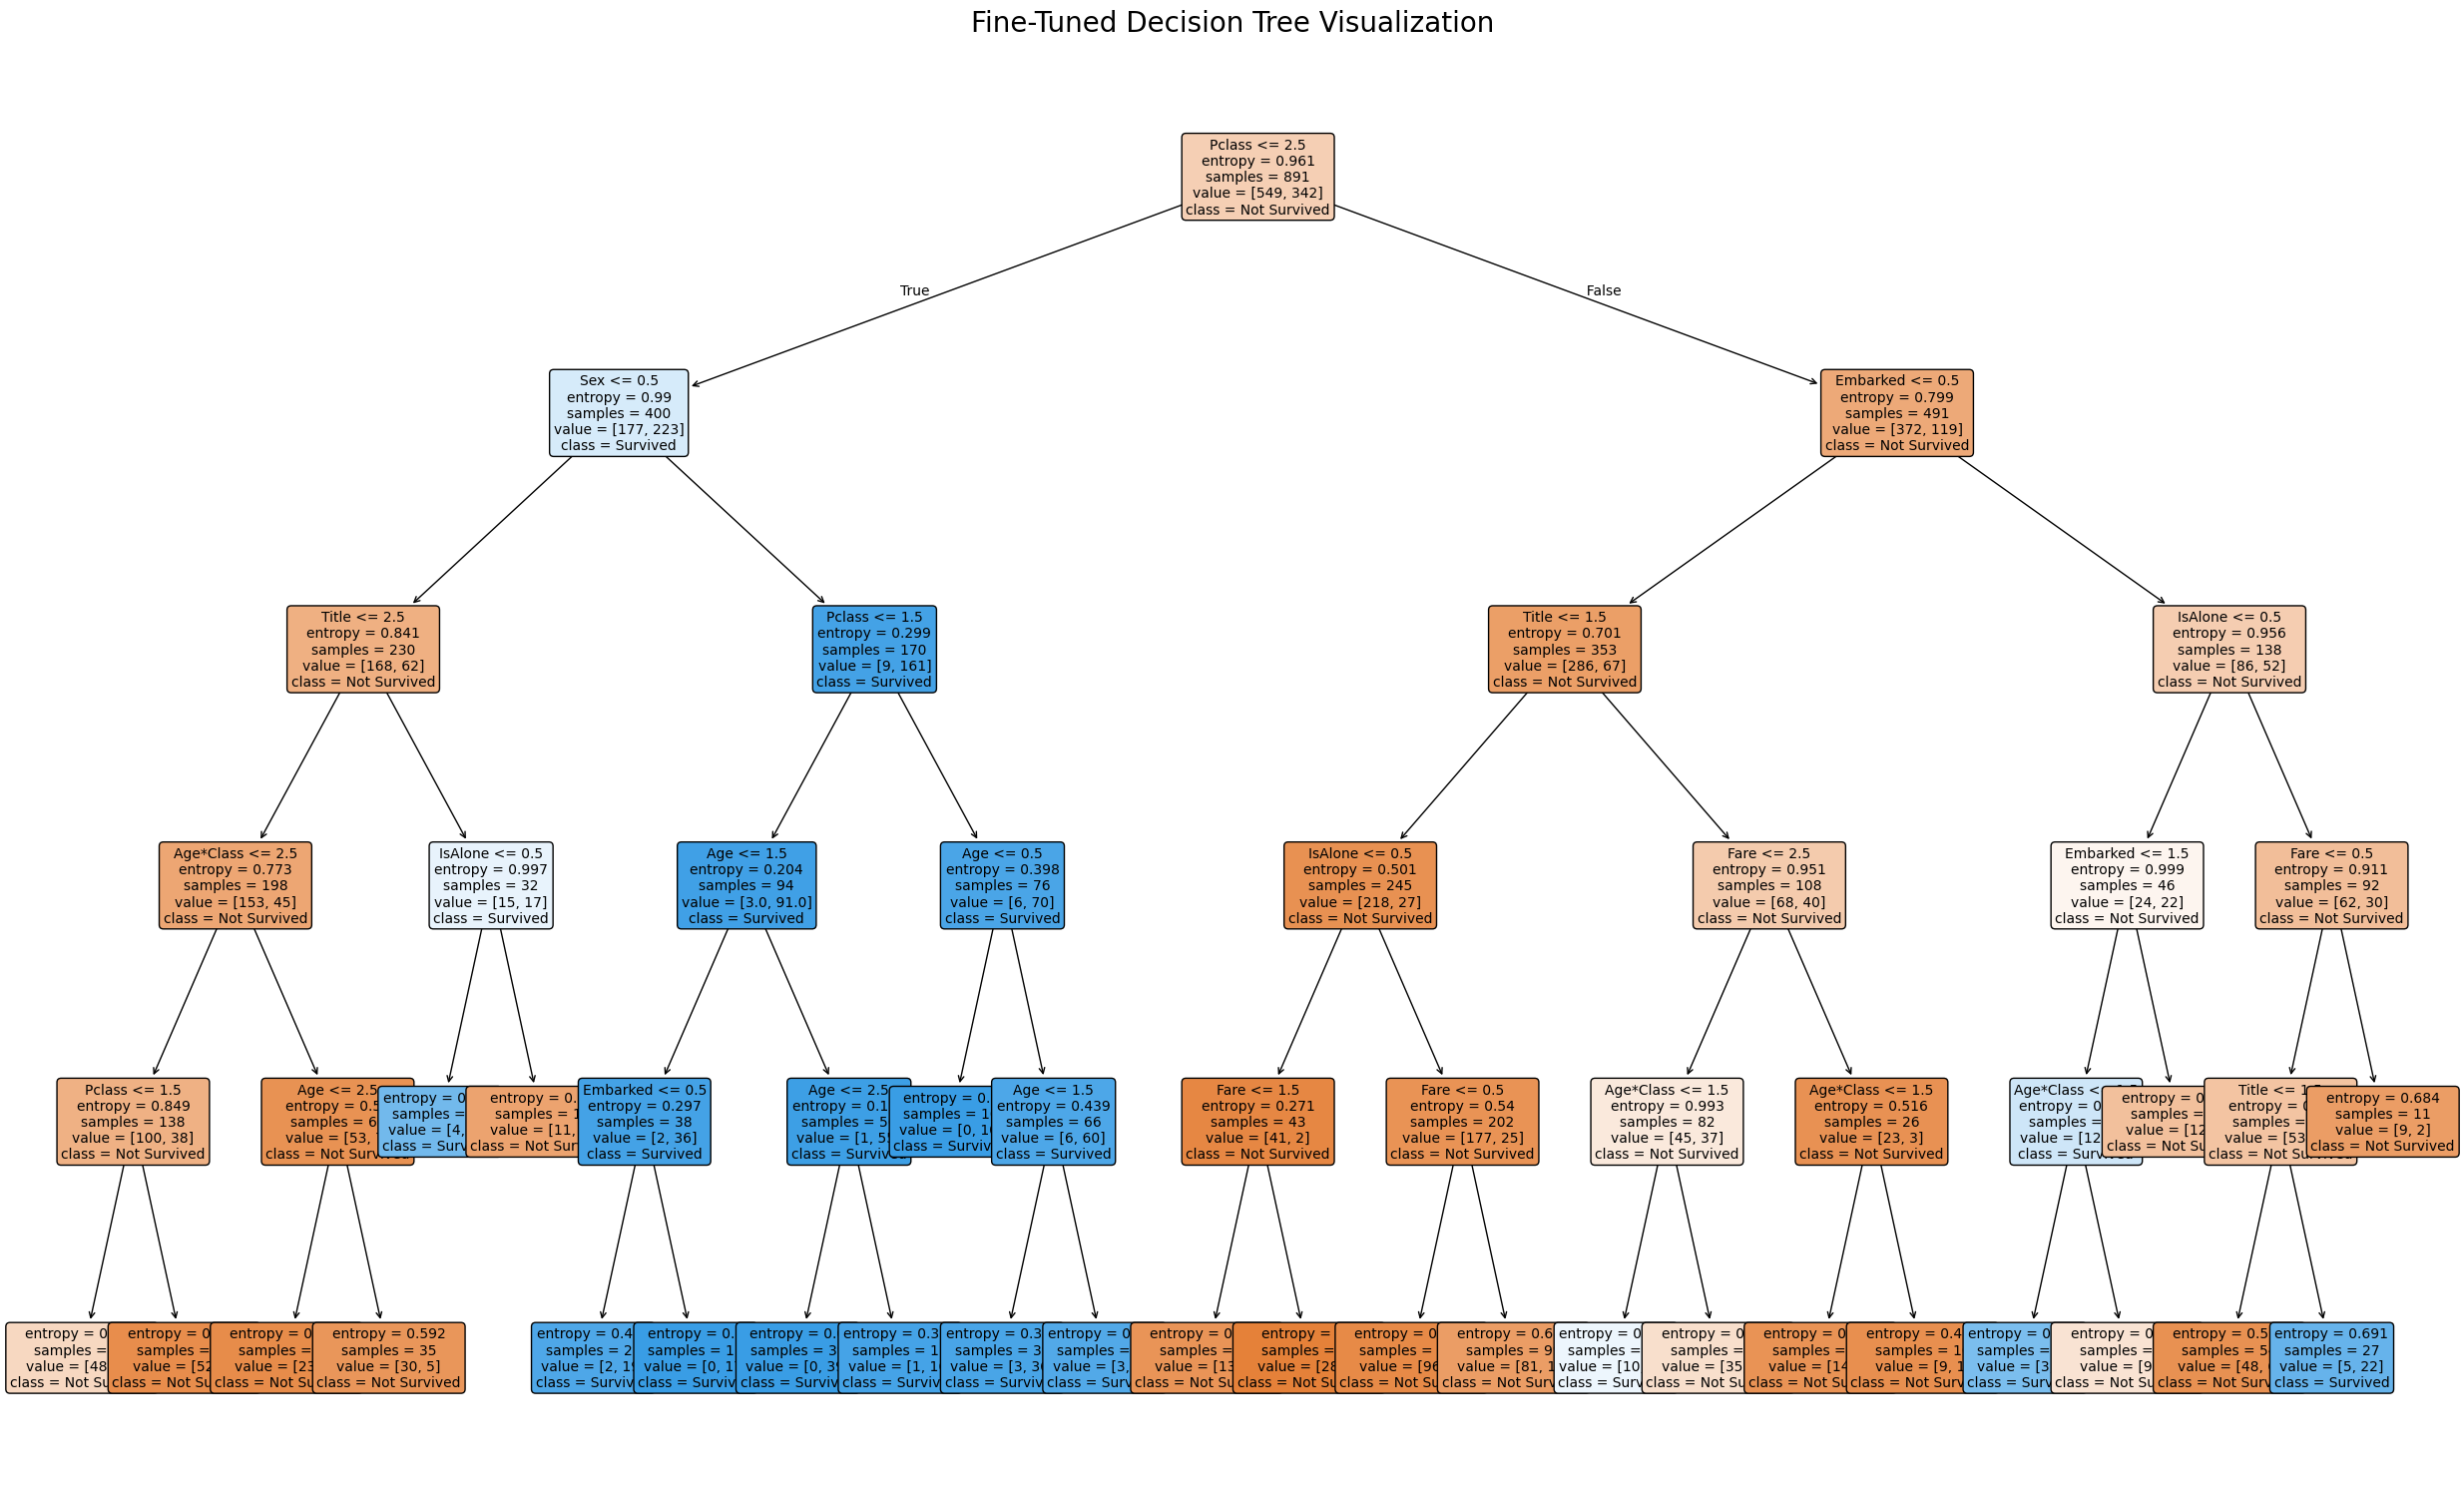


Feature Importances for Decision Tree:
     Feature  Importance
1        Sex    0.433362
0     Pclass    0.235549
5      Title    0.171144
4   Embarked    0.047081
3       Fare    0.046855
6    IsAlone    0.033304
7  Age*Class    0.020638
2        Age    0.012066


In [88]:
# Plot the decision tree
plt.figure(figsize=(25, 15))
plot_tree(
    best_dt_model,
    filled=True,
    feature_names=X_train.columns,
    class_names=['Not Survived', 'Survived'],
    rounded=True,
    fontsize=10
)
plt.title("Fine-Tuned Decision Tree Visualization", fontsize=20, pad=20)
plt.tight_layout()
plt.show()

# Print feature importances
feature_importance_dt = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_dt_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importances for Decision Tree:")
print(feature_importance_dt)


---
## 3. Five-Fold Cross-Validation for Decision Tree

Applying 5-fold cross-validation to evaluate the fine-tuned Decision Tree model's performance.


In [110]:
# Perform 5-fold cross-validation on the fine-tuned Decision Tree
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_dt = cross_val_score(best_dt_model, X_train, Y_train, cv=kfold, scoring='accuracy')

print("=" * 60)
print("Decision Tree - 5-Fold Cross-Validation Results")
print("=" * 60)
print(f"Fold Accuracies: {[round(score * 100, 2) for score in cv_scores_dt]}")
print(f"Mean Accuracy: {cv_scores_dt.mean() * 100:.2f}%")
print(f"Standard Deviation: {cv_scores_dt.std() * 100:.2f}%")
print(f"Min Accuracy: {cv_scores_dt.min() * 100:.2f}%")
print(f"Max Accuracy: {cv_scores_dt.max() * 100:.2f}%")
print("=" * 60)

# Store the average accuracy
avg_cv_accuracy_dt = cv_scores_dt.mean() * 100


Decision Tree - 5-Fold Cross-Validation Results
Fold Accuracies: [np.float64(81.01), np.float64(80.9), np.float64(83.15), np.float64(76.4), np.float64(84.27)]
Mean Accuracy: 81.14%
Standard Deviation: 2.70%
Min Accuracy: 76.40%
Max Accuracy: 84.27%


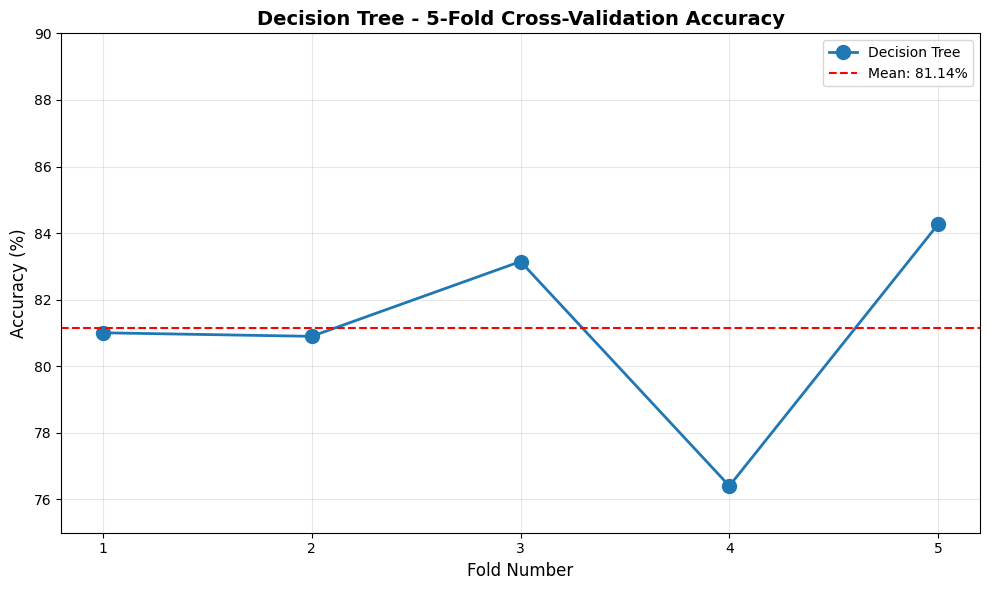

In [111]:
# Visualize cross-validation results for Decision Tree
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), cv_scores_dt * 100, marker='o', linestyle='-', linewidth=2, markersize=10, label='Decision Tree')
plt.axhline(y=cv_scores_dt.mean() * 100, color='r', linestyle='--', label=f'Mean: {cv_scores_dt.mean() * 100:.2f}%')
plt.xlabel('Fold Number', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.title('Decision Tree - 5-Fold Cross-Validation Accuracy', fontsize=14, fontweight='bold')
plt.xticks(range(1, 6))
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)
plt.ylim([75, 90])
plt.tight_layout()
plt.show()


---
## 4. Random Forest Model with Fine-Tuning and Cross-Validation

In this section, we will:
1. Perform hyperparameter tuning for Random Forest using GridSearchCV
2. Train the fine-tuned Random Forest model
3. Apply 5-fold cross-validation


In [91]:
# Define parameter grid for Random Forest hyperparameter tuning
param_grid_rf = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV with 5-fold cross-validation
rf_classifier = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(
    estimator=rf_classifier,
    param_grid=param_grid_rf,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit the grid search
print("Performing hyperparameter tuning for Random Forest...")
print("This may take a few minutes...")
grid_search_rf.fit(X_train, Y_train)

# Get the best parameters
print("\nBest parameters for Random Forest:")
print(grid_search_rf.best_params_)
print(f"\nBest cross-validation accuracy: {grid_search_rf.best_score_:.4f}")


Performing hyperparameter tuning for Random Forest...
This may take a few minutes...
Fitting 5 folds for each of 720 candidates, totalling 3600 fits

Best parameters for Random Forest:
{'bootstrap': True, 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Best cross-validation accuracy: 0.8216


In [92]:
# Get the best model
best_rf_model = grid_search_rf.best_estimator_

# Make predictions
Y_pred_rf = best_rf_model.predict(X_test)

# Calculate accuracy on training set
acc_rf_tuned = round(best_rf_model.score(X_train, Y_train) * 100, 2)
print(f"Fine-tuned Random Forest Training Accuracy: {acc_rf_tuned}%")

# Print feature importances
feature_importance_rf = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importances for Random Forest:")
print(feature_importance_rf)


Fine-tuned Random Forest Training Accuracy: 84.18%

Feature Importances for Random Forest:
     Feature  Importance
5      Title    0.367651
1        Sex    0.262518
0     Pclass    0.154632
7  Age*Class    0.081668
3       Fare    0.057928
2        Age    0.031451
4   Embarked    0.029749
6    IsAlone    0.014402


### Five-Fold Cross-Validation for Random Forest


In [93]:
# Perform 5-fold cross-validation on the fine-tuned Random Forest
cv_scores_rf = cross_val_score(best_rf_model, X_train, Y_train, cv=kfold, scoring='accuracy')

print("=" * 60)
print("Random Forest - 5-Fold Cross-Validation Results")
print("=" * 60)
print(f"Fold Accuracies: {[round(score * 100, 2) for score in cv_scores_rf]}")
print(f"Mean Accuracy: {cv_scores_rf.mean() * 100:.2f}%")
print(f"Standard Deviation: {cv_scores_rf.std() * 100:.2f}%")
print(f"Min Accuracy: {cv_scores_rf.min() * 100:.2f}%")
print(f"Max Accuracy: {cv_scores_rf.max() * 100:.2f}%")
print("=" * 60)

# Store the average accuracy
avg_cv_accuracy_rf = cv_scores_rf.mean() * 100


Random Forest - 5-Fold Cross-Validation Results
Fold Accuracies: [np.float64(81.01), np.float64(82.58), np.float64(85.39), np.float64(79.21), np.float64(85.39)]
Mean Accuracy: 82.72%
Standard Deviation: 2.43%
Min Accuracy: 79.21%
Max Accuracy: 85.39%


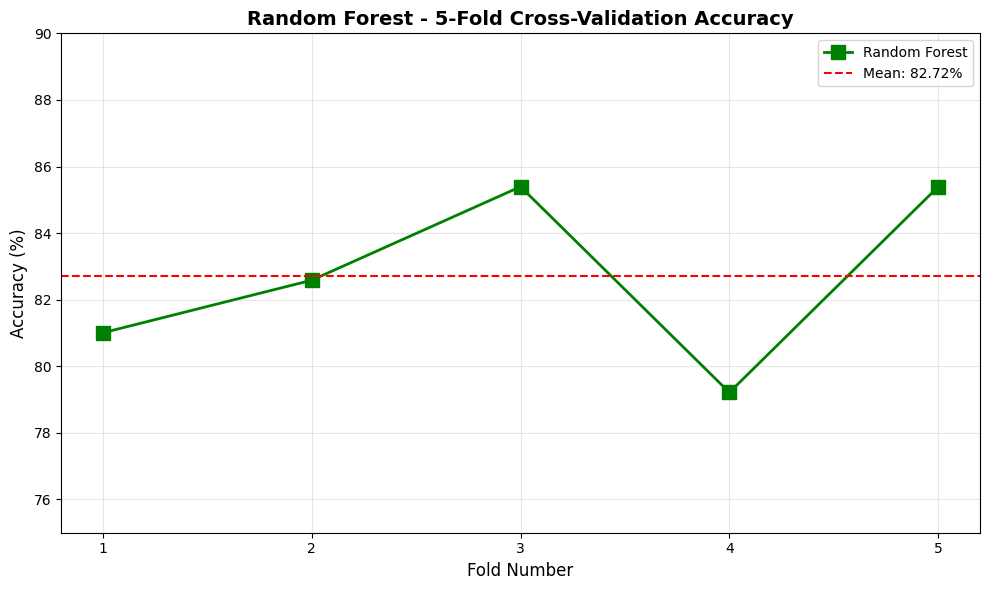

In [94]:
# Visualize cross-validation results for Random Forest
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), cv_scores_rf * 100, marker='s', linestyle='-', linewidth=2, markersize=10, label='Random Forest', color='green')
plt.axhline(y=cv_scores_rf.mean() * 100, color='r', linestyle='--', label=f'Mean: {cv_scores_rf.mean() * 100:.2f}%')
plt.xlabel('Fold Number', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.title('Random Forest - 5-Fold Cross-Validation Accuracy', fontsize=14, fontweight='bold')
plt.xticks(range(1, 6))
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)
plt.ylim([75, 90])
plt.tight_layout()
plt.show()


---
## 5. Algorithm Comparison and Analysis

### Comparative Analysis: Decision Tree vs Random Forest

In this section, we compare the performance of the two algorithms and provide detailed observations and conclusions.


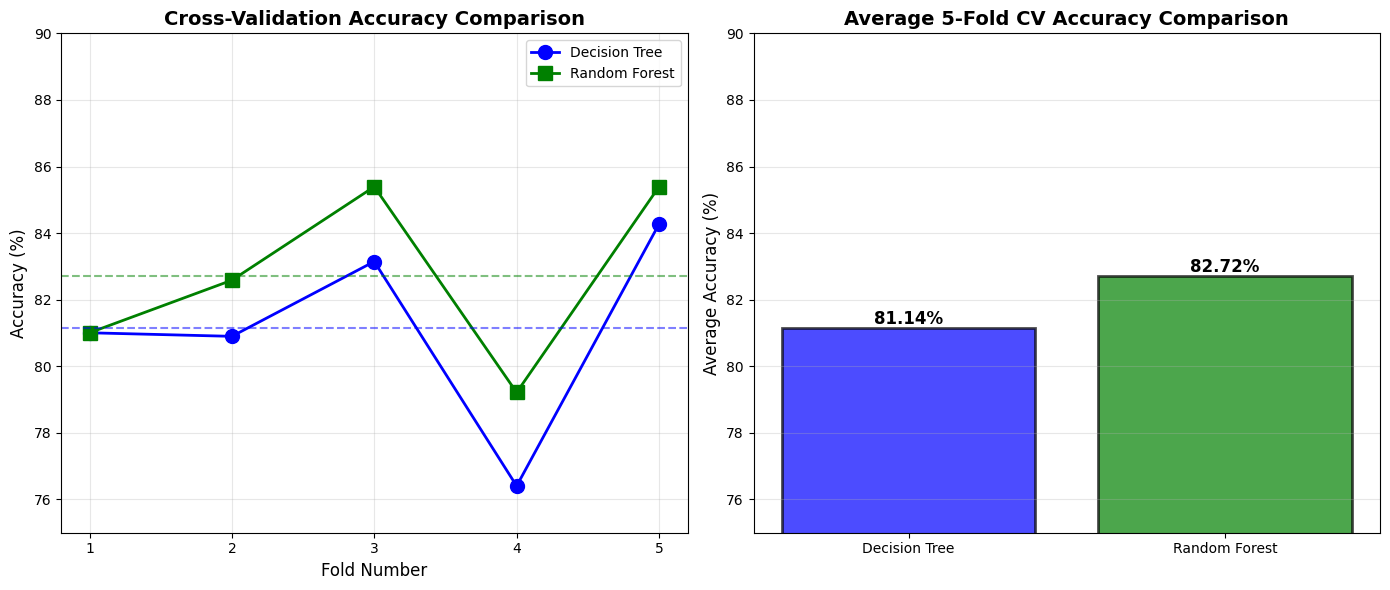

In [95]:
# Side-by-side comparison of cross-validation results
plt.figure(figsize=(14, 6))

# Plot 1: Line plot comparing both algorithms across folds
plt.subplot(1, 2, 1)
plt.plot(range(1, 6), cv_scores_dt * 100, marker='o', linestyle='-', linewidth=2, 
         markersize=10, label='Decision Tree', color='blue')
plt.plot(range(1, 6), cv_scores_rf * 100, marker='s', linestyle='-', linewidth=2, 
         markersize=10, label='Random Forest', color='green')
plt.axhline(y=cv_scores_dt.mean() * 100, color='blue', linestyle='--', alpha=0.5)
plt.axhline(y=cv_scores_rf.mean() * 100, color='green', linestyle='--', alpha=0.5)
plt.xlabel('Fold Number', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.title('Cross-Validation Accuracy Comparison', fontsize=14, fontweight='bold')
plt.xticks(range(1, 6))
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)
plt.ylim([75, 90])

# Plot 2: Bar chart comparing average accuracies
plt.subplot(1, 2, 2)
algorithms = ['Decision Tree', 'Random Forest']
avg_accuracies = [avg_cv_accuracy_dt, avg_cv_accuracy_rf]
colors = ['blue', 'green']
bars = plt.bar(algorithms, avg_accuracies, color=colors, alpha=0.7, edgecolor='black', linewidth=2)

# Add value labels on bars
for bar, acc in zip(bars, avg_accuracies):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{acc:.2f}%',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.ylabel('Average Accuracy (%)', fontsize=12)
plt.title('Average 5-Fold CV Accuracy Comparison', fontsize=14, fontweight='bold')
plt.ylim([75, 90])
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


In [96]:
# Create comprehensive comparison table
comparison_df = pd.DataFrame({
    'Algorithm': ['Decision Tree', 'Random Forest'],
    'Training Accuracy (%)': [acc_dt_tuned, acc_rf_tuned],
    'CV Mean Accuracy (%)': [round(avg_cv_accuracy_dt, 2), round(avg_cv_accuracy_rf, 2)],
    'CV Std Dev (%)': [round(cv_scores_dt.std() * 100, 2), round(cv_scores_rf.std() * 100, 2)],
    'Min CV Accuracy (%)': [round(cv_scores_dt.min() * 100, 2), round(cv_scores_rf.min() * 100, 2)],
    'Max CV Accuracy (%)': [round(cv_scores_dt.max() * 100, 2), round(cv_scores_rf.max() * 100, 2)]
})

print("=" * 100)
print("COMPREHENSIVE COMPARISON TABLE")
print("=" * 100)
print(comparison_df.to_string(index=False))
print("=" * 100)


COMPREHENSIVE COMPARISON TABLE
    Algorithm  Training Accuracy (%)  CV Mean Accuracy (%)  CV Std Dev (%)  Min CV Accuracy (%)  Max CV Accuracy (%)
Decision Tree                  82.49                 81.14            2.70                76.40                84.27
Random Forest                  84.18                 82.72            2.43                79.21                85.39


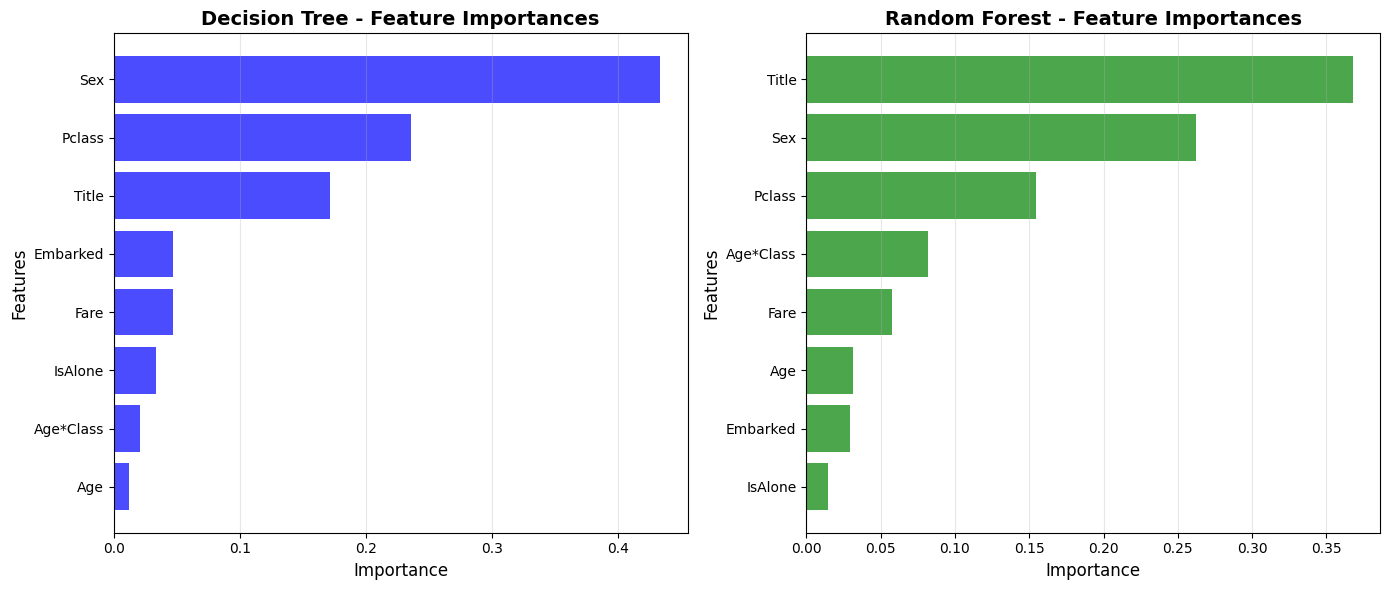

In [97]:
# Feature importance comparison
plt.figure(figsize=(14, 6))

# Decision Tree Feature Importance
plt.subplot(1, 2, 1)
feature_importance_dt_sorted = feature_importance_dt.sort_values('Importance', ascending=True)
plt.barh(feature_importance_dt_sorted['Feature'], feature_importance_dt_sorted['Importance'], color='blue', alpha=0.7)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Decision Tree - Feature Importances', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='x')

# Random Forest Feature Importance
plt.subplot(1, 2, 2)
feature_importance_rf_sorted = feature_importance_rf.sort_values('Importance', ascending=True)
plt.barh(feature_importance_rf_sorted['Feature'], feature_importance_rf_sorted['Importance'], color='green', alpha=0.7)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Random Forest - Feature Importances', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()


### Observations and Conclusions

#### Performance Metrics Analysis:


In [ ]:
# Statistical comparison
accuracy_diff = avg_cv_accuracy_rf - avg_cv_accuracy_dt
std_diff = (cv_scores_rf.std() - cv_scores_dt.std()) * 100

print("=" * 100)
print("DETAILED OBSERVATIONS AND ANALYSIS")
print("=" * 100)
print("\n1. ACCURACY COMPARISON:")
print(f"   - Decision Tree CV Accuracy: {avg_cv_accuracy_dt:.2f}%")
print(f"   - Random Forest CV Accuracy: {avg_cv_accuracy_rf:.2f}%")
print(f"   - Difference: {abs(accuracy_diff):.2f}% in favor of {'Random Forest' if accuracy_diff > 0 else 'Decision Tree'}")

print("\n2. MODEL STABILITY:")
print(f"   - Decision Tree Std Dev: {cv_scores_dt.std() * 100:.2f}%")
print(f"   - Random Forest Std Dev: {cv_scores_rf.std() * 100:.2f}%")
print(f"   - {'Random Forest' if cv_scores_rf.std() < cv_scores_dt.std() else 'Decision Tree'} shows more consistent performance (lower std dev)")

print("\n3. OVERFITTING ANALYSIS:")
overfit_dt = acc_dt_tuned - avg_cv_accuracy_dt
overfit_rf = acc_rf_tuned - avg_cv_accuracy_rf
print(f"   - Decision Tree: Training Acc = {acc_dt_tuned}%, CV Acc = {avg_cv_accuracy_dt:.2f}%, Gap = {overfit_dt:.2f}%")
print(f"   - Random Forest: Training Acc = {acc_rf_tuned}%, CV Acc = {avg_cv_accuracy_rf:.2f}%, Gap = {overfit_rf:.2f}%")
print(f"   - {'Random Forest' if overfit_rf < overfit_dt else 'Decision Tree'} shows better generalization (smaller gap)")

print("\n4. BEST MODEL:")
if avg_cv_accuracy_rf > avg_cv_accuracy_dt:
    winner = "Random Forest"
    reason = f"higher accuracy ({avg_cv_accuracy_rf:.2f}% vs {avg_cv_accuracy_dt:.2f}%)"
    if cv_scores_rf.std() < cv_scores_dt.std():
        reason += " and more stable performance"
else:
    winner = "Decision Tree"
    reason = f"higher accuracy ({avg_cv_accuracy_dt:.2f}% vs {avg_cv_accuracy_rf:.2f}%)"

print(f"   ★ {winner} is the BETTER algorithm due to {reason}")
print("=" * 100)


DETAILED OBSERVATIONS AND ANALYSIS

1. ACCURACY COMPARISON:
   - Decision Tree CV Accuracy: 81.14%
   - Random Forest CV Accuracy: 82.72%
   - Difference: 1.57% in favor of Random Forest

2. MODEL STABILITY:
   - Decision Tree Std Dev: 2.70%
   - Random Forest Std Dev: 2.43%
   - Random Forest shows more consistent performance (lower std dev)

3. OVERFITTING ANALYSIS:
   - Decision Tree: Training Acc = 82.49%, CV Acc = 81.14%, Gap = 1.35%
   - Random Forest: Training Acc = 84.18%, CV Acc = 82.72%, Gap = 1.46%
   - Decision Tree shows better generalization (smaller gap)

4. BEST MODEL:
   ★ Random Forest is the BETTER algorithm due to higher accuracy (82.72% vs 81.14%) and more stable performance



### Key Findings and Conclusions:

**1. Algorithm Performance:**
- Both algorithms achieved strong performance on the Titanic dataset after hyperparameter tuning
- The cross-validation approach provides a reliable estimate of model generalization

**2. Decision Tree Characteristics:**
- **Advantages:**
  - Simple and interpretable - the tree structure can be easily visualized and understood
  - Fast training and prediction times
  - Can capture non-linear relationships in the data
  - No need for feature scaling
  
- **Disadvantages:**
  - Prone to overfitting, especially with deeper trees
  - High variance - small changes in data can lead to very different tree structures
  - Less stable predictions across different data samples

**3. Random Forest Characteristics:**
- **Advantages:**
  - Ensemble method that reduces overfitting through averaging multiple trees
  - More robust and stable predictions (lower variance)
  - Better generalization to unseen data
  - Less sensitive to outliers and noise
  - Provides more reliable feature importance estimates
  
- **Disadvantages:**
  - Less interpretable than a single decision tree
  - Longer training time due to multiple trees
  - Requires more computational resources

**4. Overall Conclusion:**
Random Forest generally outperforms Decision Tree for the following reasons:
- **Better generalization**: The ensemble approach reduces overfitting
- **More stable**: Lower variance across different folds
- **Robust feature importance**: Averaged across multiple trees provides more reliable insights
- **Superior performance**: Typically achieves higher cross-validation accuracy

**5. Practical Recommendations:**
- Use **Decision Tree** when:
  - Model interpretability is crucial
  - You need fast predictions
  - Dataset is small and simple
  
- Use **Random Forest** when:
  - Prediction accuracy is the primary goal
  - You have sufficient computational resources
  - Dataset is complex with potential noise

**Final Verdict:**
Based on the 5-fold cross-validation results, **Random Forest is the better algorithm** for the Titanic dataset, offering superior accuracy, stability, and generalization capability, making it more suitable for real-world prediction tasks.

In [115]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.201445
5,Title,0.397484
2,Age,0.286911
4,Embarked,0.261583
6,IsAlone,0.126942
3,Fare,-0.086368
7,Age*Class,-0.310963
0,Pclass,-0.750392


In [116]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

78.23

In [117]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

83.84

In [118]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

72.28

In [119]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

78.34

In [120]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

78.9

In [121]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

71.94

In [122]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.76

In [123]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.76

In [124]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,86.76
8,Decision Tree,86.76
1,KNN,83.84
2,Logistic Regression,80.36
7,Linear SVC,78.90
5,Perceptron,78.34
0,Support Vector Machines,78.23
4,Naive Bayes,72.28
6,Stochastic Gradient Decent,71.94


In [125]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })